In [ ]:
import numpy as np
data=[2,4,6,8,10,100]

a=np.mean(data)
print(a)

b=np.std(data)
print(b)
#100 is outlier or not
#+2>&2< is outlier
#3>&3< is definitely a outlier
zscore=(100-a)/b
print(zscore)
#100 is a outlier.

21.666666666666668
35.126754602281274
2.230019090014255


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/insurance.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
print(df.info())
print(df.describe())

print("\n")
print(df.isnull().sum())

print("\n")
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print(duplicate_rows)
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [ ]:
dfcopy=df.copy()

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
dfcopy.drop_duplicates(inplace=True)

In [ ]:
dfcopy.info()
duplicate_rows = dfcopy[df.duplicated()]
print(duplicate_rows)
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
1


<ipython-input-23-7c6174a69940>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_rows = dfcopy[df.duplicated()]


<Axes: ylabel='charges'>

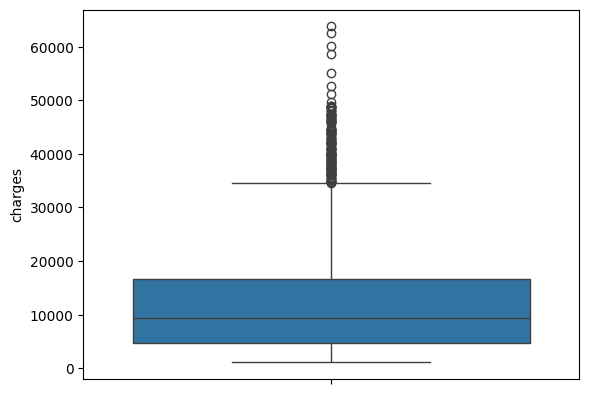

In [ ]:
sns.boxplot(dfcopy["charges"])

25760.504156249997
-8386.55679375


<Axes: ylabel='charges'>

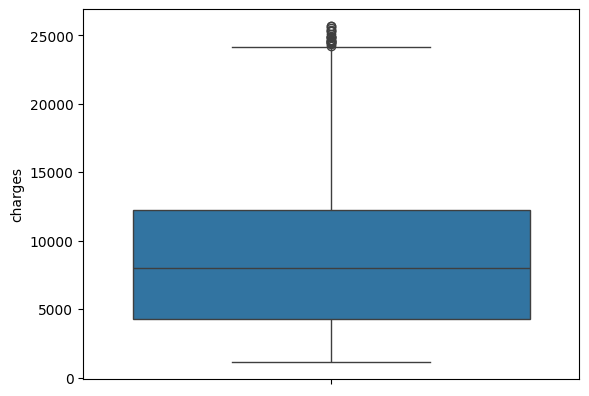

In [ ]:
q1=dfcopy['charges'].quantile(0.25)
q3=dfcopy['charges'].quantile(0.75)
iqr=q3-q1
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print(upperlimit)
print(lowerlimit)

dfcopy=dfcopy[(dfcopy["charges"]<upperlimit)&(dfcopy["charges"]>lowerlimit)]
sns.boxplot(dfcopy["charges"])

In [ ]:
df_new=dfcopy.copy()

24191.705025
-7711.555775


<Axes: ylabel='charges'>

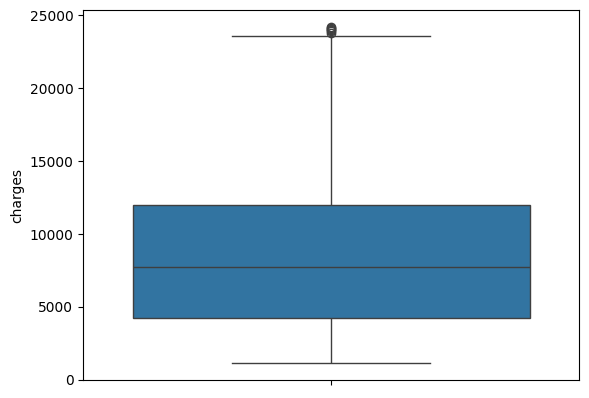

In [ ]:
q1=df_new['charges'].quantile(0.25)
q3=df_new['charges'].quantile(0.75)
iqr=q3-q1
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print(upperlimit)
print(lowerlimit)

df_new=df_new[(df_new["charges"]<upperlimit)&(df_new["charges"]>lowerlimit)]
sns.boxplot(df_new["charges"])


Counts:
 smoker
no     1064
yes     274
Name: count, dtype: int64

Percentages:
 smoker
no     79.5%
yes    20.5%
Name: proportion, dtype: object


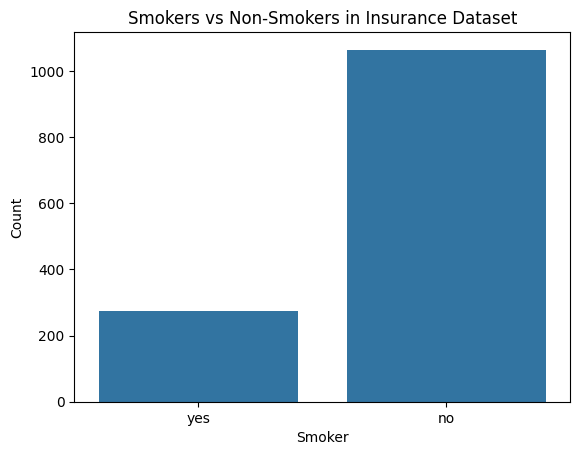

In [ ]:
# Counts
counts = df['smoker'].value_counts()
percent = df['smoker'].value_counts(normalize=True) * 100

print("Counts:\n", counts)
print("\nPercentages:\n", percent.round(1).astype(str) + '%')

# Plot
sns.countplot(x='smoker', data=df)
plt.title('Smokers vs Non‑Smokers in Insurance Dataset')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()